<a href="https://colab.research.google.com/github/smallriver0316/python-datascience-study/blob/development/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits

sns.set()

In [2]:
digits = load_digits()
digits.images.shape

(1797, 8, 8)

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

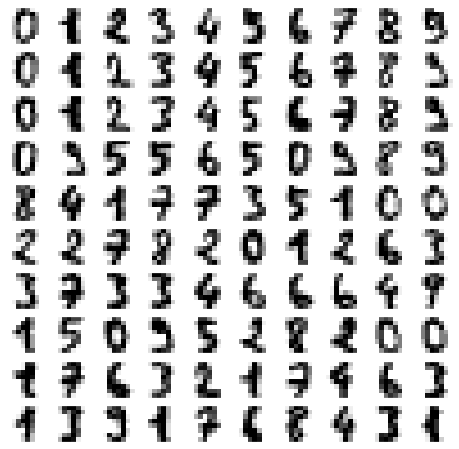

In [ ]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
  ax.imshow(digits.images[i], cmap='binary')
  ax.set(xticks=[], yticks=[])

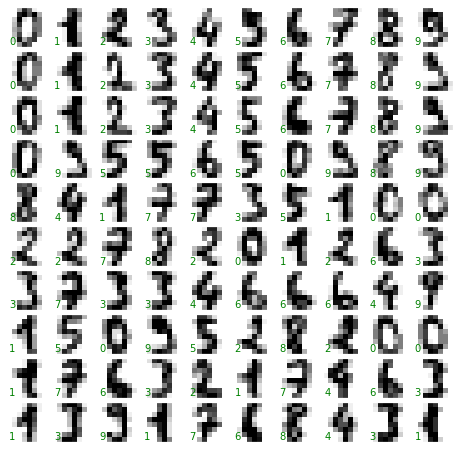

In [ ]:
# 添え字を追加
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                       subplot_kw={'xticks': [], 'yticks': []},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
  ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
  ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

In [ ]:
# 教師なし学習
# 次元削減による可視化
# Isomap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

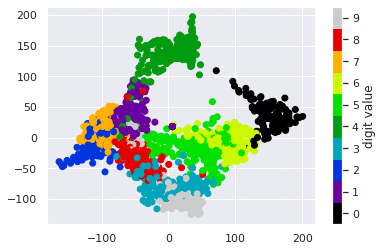

In [ ]:
plt.scatter(projection[:, 0],
            projection[:, 1],
            c=digits.target,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(ticks=range(10), label='digit value')
# clim: color limit, range of colorbar
plt.clim(-0.5, 9.5)

In [ ]:
# 2次元投影
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None, thumb_frac=0.05, cmap='gray'):
  ax = ax or plt.gca()

  proj = model.fit_transform(data)
  ax.plot(proj[:, 0], proj[:, 1], '.k')

  if images is not None:
    min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
    shown_images = np.array([2 * proj.max(0)])
    for i in range(data.shape[0]):
      dist = np.sum((proj[i] - shown_images) ** 2, 1)
      if np.min(dist) < min_dist_2:
        # don't show points that are too close
        continue
      shown_images = np.vstack([shown_images, proj[i]])
      imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(images[i], cmap=cmap), proj[i])
      ax.add_artist(imagebox)

In [ ]:
# 一度に一つの数字だけ見てみる
data = digits.data[digits.target == 2]
data.shape

(177, 64)

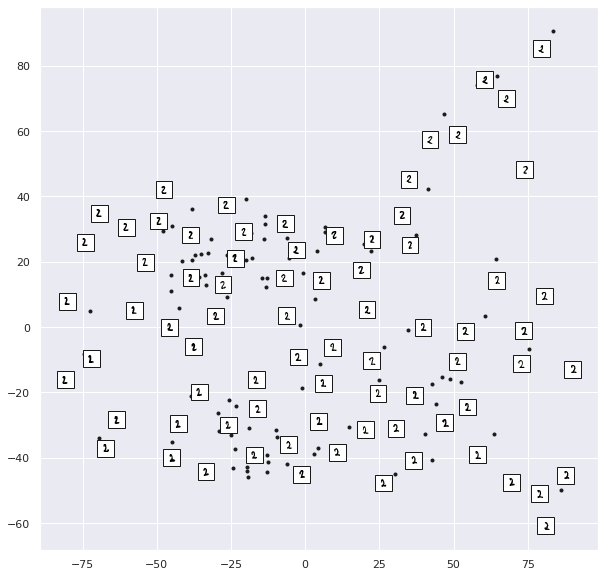

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
model = Isomap(n_neighbors=5, n_components=2, eigen_solver='dense')
plot_components(data, model, images=data.reshape((-1, 8, 8)), ax=ax, thumb_frac=0.05, cmap='gray_r')

- 数字2がデータセット内で取りえる多様なスタイルを可視化
- 下から上へは、数字の傾きを反映しているように見える

In [ ]:
# 教師あり学習
X = digits.data
X.shape

(1797, 64)

In [ ]:
y = digits.target
y.shape

(1797,)

In [ ]:
# GMMによる分類
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

Text(89.18, 0.5, 'true value')

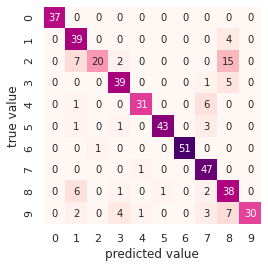

In [ ]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='RdPu')
plt.xlabel('predicted value')
plt.ylabel('true value')



*   2の多くが誤って8に割り当てられている
*   9のいくつかは7に割り当てられている
*   etc



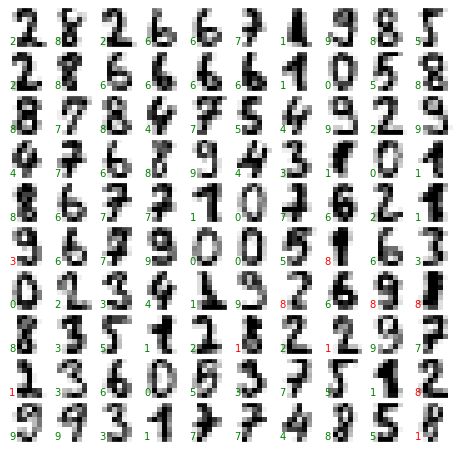

In [ ]:
# 予測された値を使って再度プロットする
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks': [], 'yticks': []},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
test_images = Xtest.reshape(-1, 8, 8)
for i, ax in enumerate(axes.flat):
  ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
  ax.text(0.05, 0.05, str(y_model[i]),
          transform=ax.transAxes,
          color='green' if (ytest[i] == y_model[i]) else 'red')

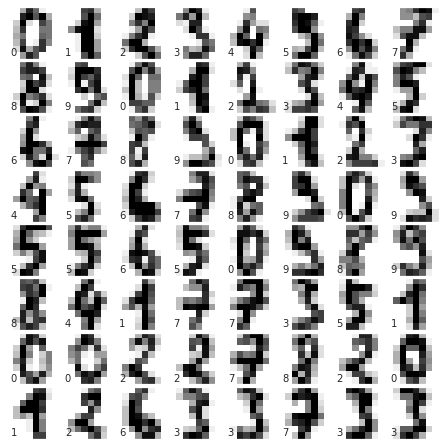

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# set up the figure
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits
for i in range(64):
  ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
  ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
  # label the image with the target value
  ax.text(0, 7, str(digits.target[i]))

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.95      0.97        44
           2       0.95      1.00      0.98        42
           3       0.98      0.98      0.98        45
           4       0.97      1.00      0.99        37
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



Text(89.18, 0.5, 'predicted label')

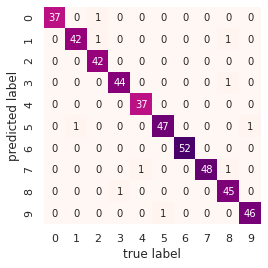

In [ ]:
# 混合行列
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='RdPu')
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
# PCAによる可視化
from sklearn.decomposition import PCA

# 8x8画像(64次元)を2次元に削減
pca = PCA(2)
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


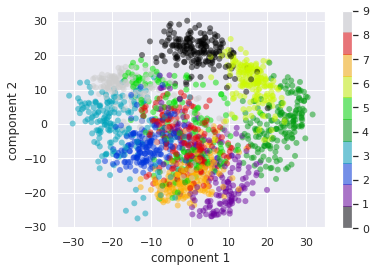

In [ ]:
plt.scatter(projected[:, 0],
            projected[:, 1],
            c=digits.target,
            edgecolor='none',
            alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

Text(0, 0.5, 'cumulative explained variance')

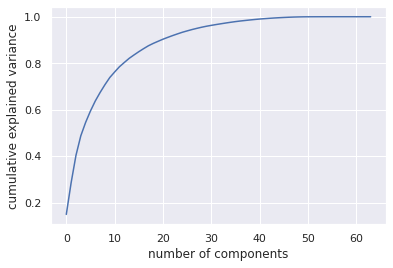

In [ ]:
# 累積因子寄与率
# PCAがデータの内容をどの程度保持しているかを示す
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

50個の成分でほぼ100%の分散をカバーできる

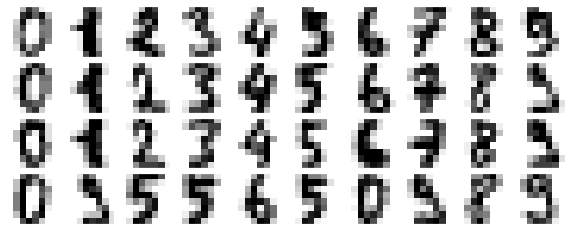

In [3]:
# PCAによるノイズ除去
# ノイズ付与前の画像を表示
def plot_digits(data):
  fig, axes = plt.subplots(4,
                           10,
                           figsize=(10, 4),
                           subplot_kw={'xticks': [], 'yticks': []},
                           gridspec_kw=dict(hspace=0.1, wspace=0.1))
  for i, axi in enumerate(axes.flat):
    axi.imshow(data[i].reshape(8, 8),
               cmap='binary',
               interpolation='nearest',
               clim=(0, 16))
plot_digits(digits.data)

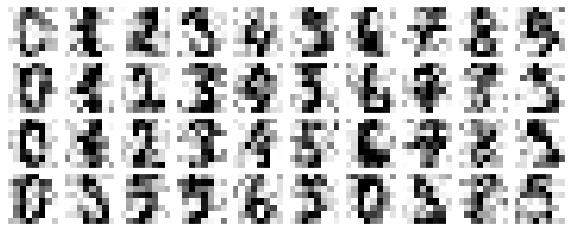

In [ ]:
# ノイズを付与
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [ ]:
# 分散の50%を維持するように学習する
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

分散の50%は12個の主成分に相当

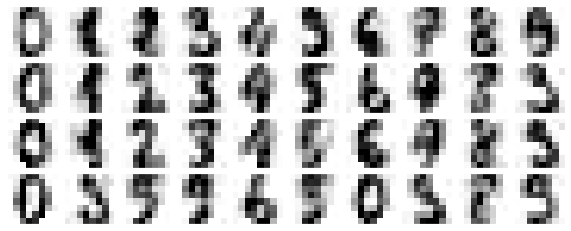

In [ ]:
components = pca.transform(noisy)
# 逆変換
# inverse_transform; 12個の主成分を元の64次元に逆変換
# ノイズを除いた主要な特徴のみから画像が生成されるはず
filtered = pca.inverse_transform(components)
plot_digits(filtered)

In [ ]:
# KMeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

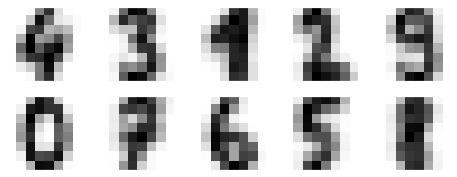

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
  axi.set(xticks=[], yticks=[])
  axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

- クラスタ中心が認識可能な数字であれば、ラベルがなくてもk平均法で認識可能
- k平均法はクラスタがどういうものかを意識していないので、データは昇順に表示されるとは限らない

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
  mask = (clusters == i)
  labels[mask] = mode(digits.target[mask])[0]

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(digits.target, labels)

0.7952142459654981

Text(89.18, 0.5, 'predicted labels')

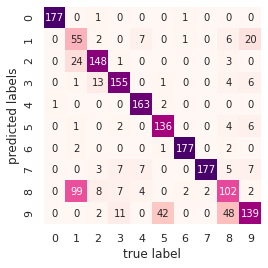

In [ ]:
# 混合行列
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T,
            square=True,
            annot=True,
            fmt='d',
            cbar=False,
            cmap='RdPu',
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted labels')

1と9, 5と9などは識別が困難

In [ ]:
# t分布を使った確率的近傍埋め込み(tSNE)を使ってデータを前処理する
from sklearn.manifold import TSNE

# データを投影
tsne = TSNE(n_components=2, init='pca', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
  mask = (clusters == i)
  labels[mask] = mode(digits.target[mask])[0]

accuracy_score(digits.target, labels)

0.9398998330550918

Text(89.18, 0.5, 'predicted labels')

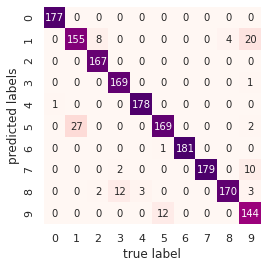

In [ ]:
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T,
            square=True,
            annot=True,
            fmt='d',
            cbar=False,
            cmap='RdPu',
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted labels')

In [4]:
# GMMによる手書き数字の生成
# GMMは高次元空間では収束させるのが難しい可能性あるため、前処理として次元削減を行う
from sklearn.decomposition import PCA

pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
data.shape

(1797, 41)

64 -> 41次元に削減

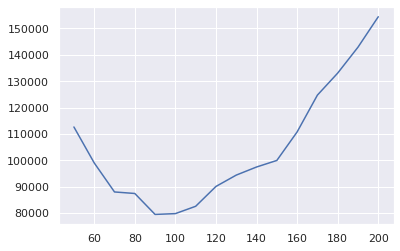

In [7]:
from sklearn.mixture import GaussianMixture

n_components = np.arange(50, 210, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0, reg_covar=0.001) for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics)

最適なクラスタ数は100

In [8]:
gmm = GaussianMixture(100, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_)

True


In [10]:
data_new, _ = gmm.sample(100)
data_new.shape

(100, 41)

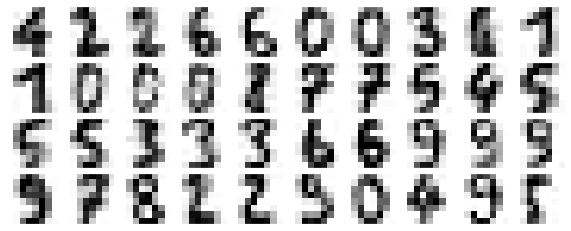

In [11]:
digits_new = pca.inverse_transform(data_new)
plot_digits(digits_new)